In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.losses import SparseCategoricalCrossentropy 
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd 
import numpy  as np


%matplotlib inline

In [2]:
data = pd.read_csv("emnist-balanced-train.csv")
data_t = pd.read_csv("emnist-balanced-test.csv")

In [3]:
data.iloc[:,0].min(),data.iloc[:,0].max()
data_t.iloc[:,0].min(),data_t.iloc[:,0].max()

(0, 46)

In [4]:
x = data.iloc[:,1:].values
y=data.iloc[:,0].values
x_t = data_t.iloc[:,1:].values
y_t=data_t.iloc[:,0].values
x.shape,y.shape,x_t.shape,y_t.shape

((112799, 784), (112799,), (18799, 784), (18799,))

In [19]:
x_train=x
x_test=x_t
y_train=y
y_test=y_t

In [20]:
x_train = x_train / 255
x_test = x_test / 255

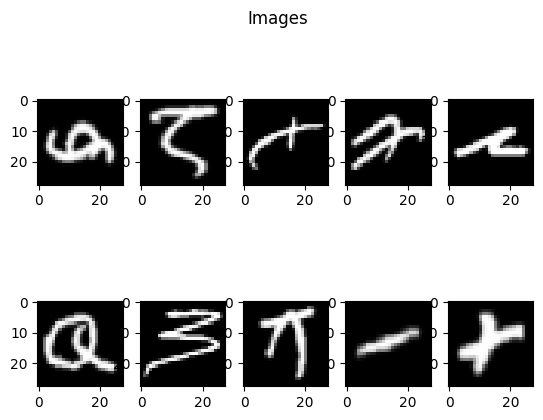

In [21]:
plt.suptitle('Images')
for i in range(10):
    image = x_train[i].reshape((28,28))
    plt.subplot(2,5,i+1)
    plt.imshow(image,cmap="gray")

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42, criterion = "log_loss")

In [23]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(criterion='log_loss', random_state=42)

In [24]:
def print_score(model, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = model.predict(X_train)
        print("Train Result:")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        
    elif train==False:
        pred = model.predict(X_test)
        print("Test Result:")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")

In [25]:
print("Random forest::")
print_score(rf_model, x_train, y_train, x_test, y_test, train=True)
print_score(rf_model, x_train, y_train, x_test, y_test, train=False)

Random forest::
Train Result:
Accuracy Score: 100.00%
Test Result:
Accuracy Score: 81.40%


In [2]:
ascii_map = {} 
# Mapping over the emnist-balanced-mapping.txt contianing the assci vlaues of every output of the ann
with open("emnist-balanced-mapping.txt", "r") as file: 
        lines = file.readlines() 
        for line in lines: 
                index, ascii_value = map(int, line.split()) 
                character = chr(ascii_value) 
                ascii_map[index] = character 

In [3]:
def letter(prediction): 
        return ascii_map[prediction]

In [28]:
import pickle
# Save the model to a file
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

In [5]:
import pickle
with open("rf_model.pkl", "rb") as f:
    new_model = pickle.load(f)

Predicted Label: A


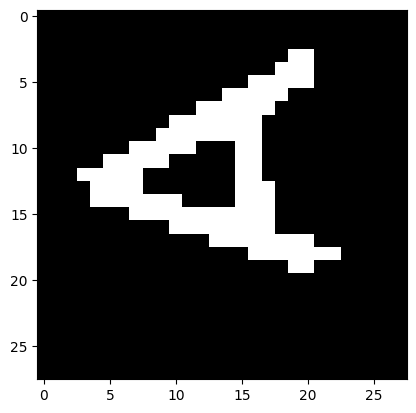

In [6]:
import numpy as np
from PIL import Image 
import cv2

image_path = 'letter.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

image = cv2.resize(image, (28, 28))

# Invert the image
image = cv2.bitwise_not(image)

# Rotate the image by -90 degrees
image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)

#Flip on x axis
image= cv2.flip(image, 0)

plt.imshow(image, cmap="gray")

image_array = image / 255.0
image_array = image_array.reshape(1, 784)


predicted_probabilities = new_model.predict(image_array)
print("Predicted Label:", letter(predicted_probabilities[0]))

In [31]:
letters={i: chr(ord('a') + i) for i in range(26)}
letters

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z'}

[11]
[10]
[10]
[27]


['B', 'A', 'A', 'R']

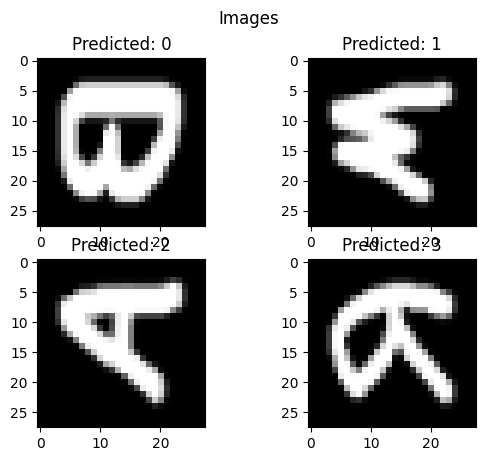

In [7]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('letter3.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to binary
_, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

# Find contours of the characters
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours based on their x-coordinate
contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])

predictions = []

plt.suptitle('Images')
i = 0
for contour in contours:
    # Get bounding box coordinates for each character
    x, y, w, h = cv2.boundingRect(contour)
    
    # Extract individual character using slicing and resize it to 28x28 pixels 
    char_image = gray[y:y+h, x:x+w]
    
    # Apply properties to the segment
    img_resized = cv2.resize(char_image, (28, 28))
    img_resized = cv2.bitwise_not(img_resized)
    img_resized = cv2.copyMakeBorder(img_resized, 5, 5, 5, 5, cv2.BORDER_CONSTANT, value=(0,0,0))
    img_resized = cv2.resize(img_resized, (28, 28))
    img_resized = cv2.flip(img_resized, 0)
    img_resized = np.rot90(img_resized, -1)
    
    plt.subplot(2, 2, i + 1)
    plt.title(f"Predicted: {i}")
    i += 1
    plt.imshow(img_resized, cmap="gray")
    img_resized = img_resized / 255.0
    
    # Flatten image
    img_flattened = img_resized.reshape(1, 784)
    
    predicted_probabilities = new_model.predict(img_flattened)
    print(predicted_probabilities)
    # prediction_p = tf.nn.softmax(predicted_probabilities)
    # predicted_labels = np.argmax(prediction_p)
    
    # Append each character's image into a list 
    predictions.append(letter(predicted_probabilities[0]))

predictions
    
    # plt.suptitle('Images')
    # i = 0
    # plt.subplot(2, 2, i + 1)
    # plt.title(f"Predicted: {i}")
    # i += 1
    # plt.imshow(img_resized, cmap="gray")